# Data Manipulation Assignment: Combining and Analyzing Retail Data

This assignment is designed to test your ability to work with multiple datasets using Pandas. You will be provided with separate files for customer information and sales transactions. Your task is to clean, combine, and analyze these datasets to gain a complete view of our business performance.

## The Datasets

You will work with the following files:

- `customers.csv`: Contains customer-level information (`CustomerID`, `CustomerName`, `CustomerAge`, `Gender`, `City`).
- `online_sales.csv`: Contains online sales transactions (`TransactionID`, `CustomerID`, `ProductCategory`, `TransactionAmount`, `SalesChannel`, `PurchaseDate`).
- `in_store_sales.csv`: Contains in-store sales transactions (`TransactionID`, `CustomerID`, `ProductCategory`, `TransactionAmount`, `SalesChannel`, `PurchaseDate`).

---

## Part 1: Data Loading and Initial Inspection

**Objective:** Load the three datasets and perform a preliminary inspection of their structure.

1.  Load `customers.csv`, `online_sales.csv`, and `in_store_sales.csv` into separate Pandas DataFrames.
2.  Display the first 5 rows and a summary (`.info()`) for each DataFrame to understand its structure.

---


In [1]:
import os 
os.listdir()

['.ipynb_checkpoints',
 'customers.csv',
 'data_manipulation_assignment.ipynb',
 'in_store_sales.csv',
 'online_sales.csv']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 1.Load customers.csv,onlin_sales.csv,and in_store_sales.csv
customers_df=pd.read_csv('customers.csv')
online_sales_df=pd.read_csv('online_sales.csv')
store_sales_df=pd.read_csv('in_store_sales.csv')
print("Display the firs 5 rows of customers:")
print(customers_df.head())
print("Display the summary of the customers:")
print(customers_df.info())
print("="*50)
print("Display the firs 5 rows of online sales:")
print(online_sales_df.head())
print("Display the summary of the online sales:")
print(online_sales_df.info())
print("="*50)
print("Display the firs 5 rows of store sales:")
print(store_sales_df.head())
print("Display the summary of the store sales:")
print(store_sales_df.info())

Display the firs 5 rows of customers:
   CustomerID    CustomerName  CustomerAge  Gender       City
0        1001      Isha Hegde           54    Male      Delhi
1        1002   Kavita DSouza           21    Male    Kolkata
2        1003      Diya Gupta           19  Female    Kolkata
3        1004  Vivaan Iyengar           45    Male  Hyderabad
4        1005  Ananya Iyengar           18  Female    Chennai
Display the summary of the customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    5000 non-null   int64 
 1   CustomerName  5000 non-null   object
 2   CustomerAge   5000 non-null   int64 
 3   Gender        5000 non-null   object
 4   City          5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB
None
Display the firs 5 rows of online sales:
   TransactionID  CustomerID ProductCategory  Transact

## Part 2: Data Concatenation (`pd.concat`)

**Objective:** Combine the sales data from different channels into a single, unified DataFrame.

3.  Concatenate the `online_sales` and `in_store_sales` DataFrames to create a new DataFrame called `all_sales_df`.
4.  Check the shape and the first 5 rows of `all_sales_df` to ensure the concatenation was successful.
5.  Check for and handle any duplicate entries in the `all_sales_df`.
6.  Display the counts of each `SalesChannel` to confirm all data was included.

---

In [3]:
# 3. Concatenate the online_sales and in_store_sales DataFrames to creat a new DataFrame
all_sales_df=pd.concat([online_sales_df,store_sales_df],ignore_index=True)
# 4.Check the shape and the first 5 rows of all_sales_df to ensure the concatenation was successful
print("shape of the DataFrame:",all_sales_df.shape)
print("The first 5 rows of the all_sales_df DataFrame:")
print(all_sales_df.head())
# 5.Check for and handle any duplicate entries in the all_sales_df
duplicated_sales=all_sales_df.duplicated().sum()
print('Checking the duplicate entries in the all_sales_df:',duplicated_sales)
# 6.Display the counts of each SalesChannel to confirm all data was included.
count_sales=all_sales_df['SalesChannel'].value_counts()
print("Display the counts of each SalesChannel:")
print(count_sales)

shape of the DataFrame: (5000, 6)
The first 5 rows of the all_sales_df DataFrame:
   TransactionID  CustomerID ProductCategory  TransactionAmount SalesChannel  \
0          10001        1603           Books        2708.445962       Online   
1          10002        4548         Apparel        2822.318124       Online   
2          10003        1784       Groceries        1935.709806       Online   
3          10004        5144     Electronics        1631.719666       Online   
4          10005        5458           Books        1482.805834       Online   

  PurchaseDate  
0   2023-12-31  
1   2023-09-18  
2   2023-02-25  
3   2023-07-12  
4   2023-01-13  
Checking the duplicate entries in the all_sales_df: 0
Display the counts of each SalesChannel:
SalesChannel
Online      2500
In-Store    2500
Name: count, dtype: int64


## Part 3: Data Merging (`pd.merge`) and Analysis

**Objective:** Join the combined sales data with the customer data to enable a rich, cross-dataset analysis.

7.  Merge the `all_sales_df` with the `customers` DataFrame on the common column `CustomerID`. Store the result in a new DataFrame called `combined_data`.
8.  Check the shape and `info()` of `combined_data` to ensure the join was successful.
9.  Find the top 5 cities with the highest total sales.
10. Calculate the average transaction amount for each `ProductCategory`.
11. Determine the number of unique customers who made a purchase in each `SalesChannel`.

---

In [4]:
# 7. Merge the all_sales_df with the customers DataFrame on the common column CustomerID and store it on combined_data
combined_data=pd.merge(all_sales_df,customers_df,on='CustomerID',how='inner')
#8.Check the shape and info() of combined_data 
print("shape of the dataframe:",combined_data.shape)
print("summary of the dataframe:")
print(combined_data.info())
# 9. Find the top 5 cities with high total sales
top_cities=combined_data.groupby('City')['TransactionAmount'].sum().sort_values(ascending=False).head()
print('Top 5 cities with high total sales')
print(top_cities)
# 10. Calculate the average transaction amount for each ProductCategory
average_amount=combined_data.groupby('ProductCategory')['TransactionAmount'].mean()
print('Average transaction amount for each ProductCategory:')
print(average_amount)
# 11. Determine the number of unique customers who made a purchase in each SalesChannel
unique_channels=combined_data.groupby('SalesChannel')['CustomerName'].nunique()
print("Number of unique customers who made a purchase in each SalesChannel:")
print(unique_channels)

shape of the dataframe: (5000, 10)
summary of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      5000 non-null   int64  
 1   CustomerID         5000 non-null   int64  
 2   ProductCategory    5000 non-null   object 
 3   TransactionAmount  5000 non-null   float64
 4   SalesChannel       5000 non-null   object 
 5   PurchaseDate       5000 non-null   object 
 6   CustomerName       5000 non-null   object 
 7   CustomerAge        5000 non-null   int64  
 8   Gender             5000 non-null   object 
 9   City               5000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 390.8+ KB
None
Top 5 cities with high total sales
City
Hyderabad    1.925573e+06
Bangalore    1.898252e+06
Chennai      1.867940e+06
Pune         1.798697e+06
Delhi        1.720877e+06
Name: Transaction

## Part 4: Data Visualization

**Objective:** Create informative plots to visually represent key insights from the combined data.

12. Create a bar plot showing the total `TransactionAmount` for each `City`.
13. Visualize the total sales amount by `ProductCategory` using a bar plot.
14. Create a histogram of the `CustomerAge` distribution for customers who made a purchase.
15. Use a box plot to show the distribution of `TransactionAmount` across different `ProductCategory`s.
16. Create a bar plot to show the average `TransactionAmount` by `Gender`.

C:\Users\home\AppData\Local\Temp\ipykernel_8788\1190641888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(total_amount,palette=['blue','yellow','green','red','pink','orange','purple'])


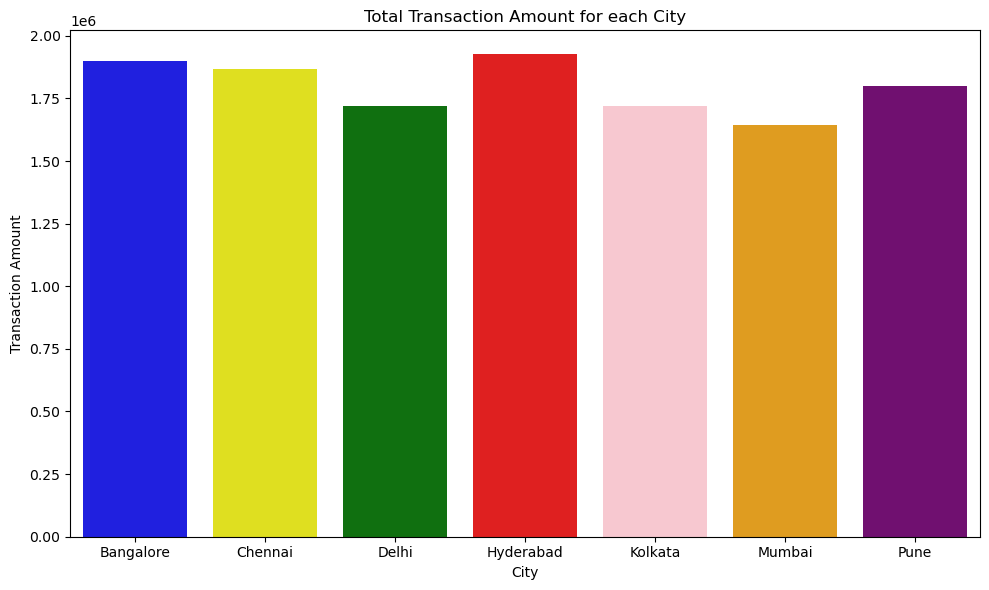

In [5]:
# 12.Create a bar plot showing the total TransactionAmount for each City.
plt.figure(figsize=(10,6))
total_amount=combined_data.groupby('City')['TransactionAmount'].sum()
sns.barplot(total_amount,palette=['blue','yellow','green','red','pink','orange','purple'])
plt.title('Total Transaction Amount for each City')
plt.xlabel('City')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()
           

C:\Users\home\AppData\Local\Temp\ipykernel_7896\1273439617.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(total_amount,palette=['salmon','purple','lightgreen','saddlebrown','goldenrod'])


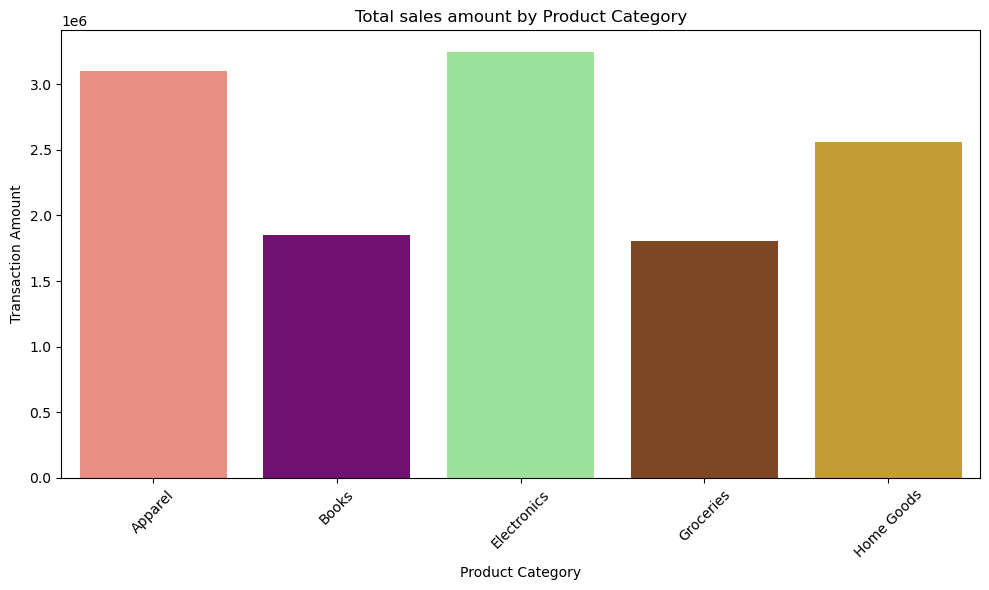

In [22]:
# 13.Visualize the total sales amount by ProductCategory using a bar plot.
plt.figure(figsize=(10,6))
total_amount=combined_data.groupby('ProductCategory')['TransactionAmount'].sum()
sns.barplot(total_amount,palette=['salmon','purple','lightgreen','saddlebrown','goldenrod'])
plt.title('Total sales amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Transaction Amount')
plt.tick_params(axis='x',rotation=45)
plt.tight_layout()
plt.show()



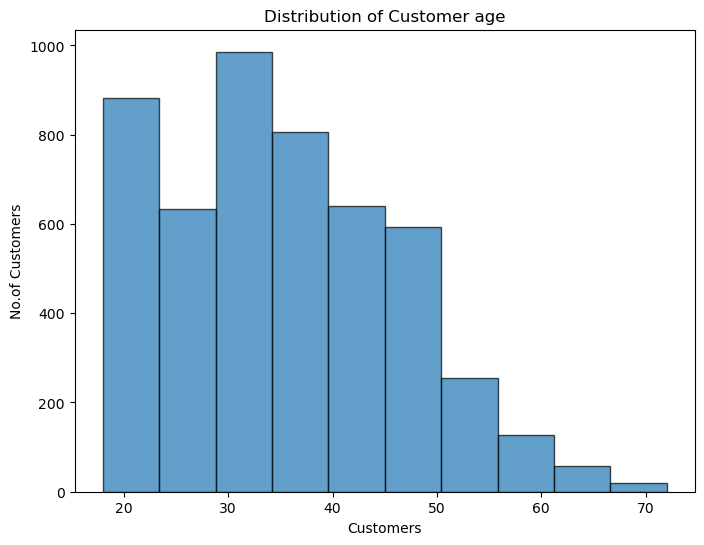

In [29]:
#14.Create a histogram of the CustomerAge distribution for customers who made a purchase.
plt.figure(figsize=(8,6))
plt.hist(combined_data['CustomerAge'],bins=10,edgecolor='black',alpha=0.7)
plt.title('Distribution of Customer age')
plt.xlabel('Customers')
plt.ylabel('No.of Customers')
plt.show()

<Figure size 1000x800 with 0 Axes>

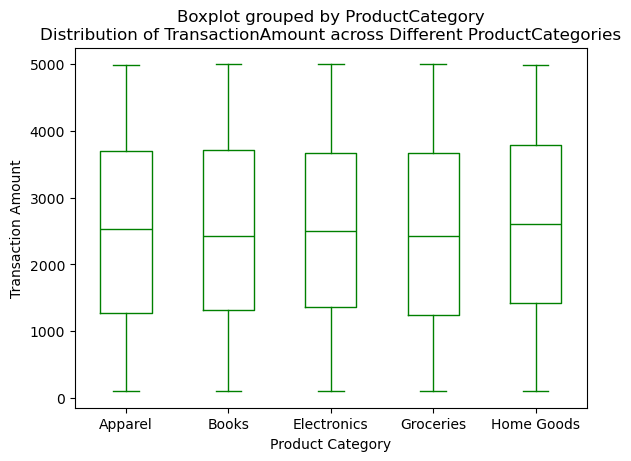

In [49]:
#15.Use a box plot to show the distribution of TransactionAmount across different ProductCategorys.
plt.figure(figsize=(10,8))
combined_data.boxplot(column='TransactionAmount',by='ProductCategory',grid=False,color='green')
plt.title('Distribution of TransactionAmount across Different ProductCategories')
plt.xlabel('Product Category')
plt.ylabel('Transaction Amount')
plt.show()
           

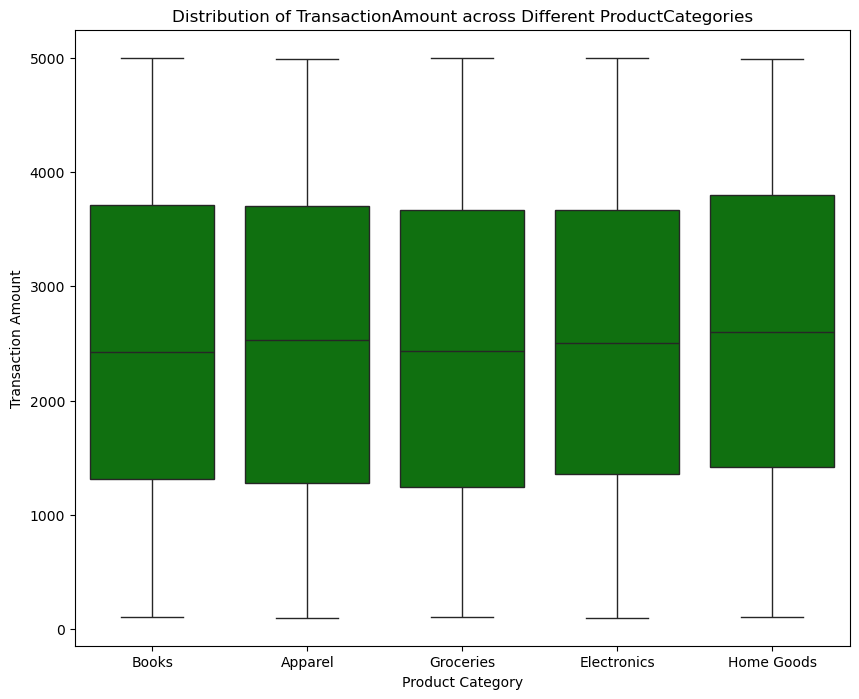

In [50]:
# Using sns.boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x='ProductCategory',y='TransactionAmount',data=combined_data ,color='green')
plt.title('Distribution of TransactionAmount across Different ProductCategories')
plt.xlabel('Product Category')
plt.ylabel('Transaction Amount')
plt.show()

Gender
Female    2522.186245
Male      2507.688228
Name: TransactionAmount, dtype: float64


C:\Users\home\AppData\Local\Temp\ipykernel_7896\466836530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(average_amount,palette=['green','purple'])


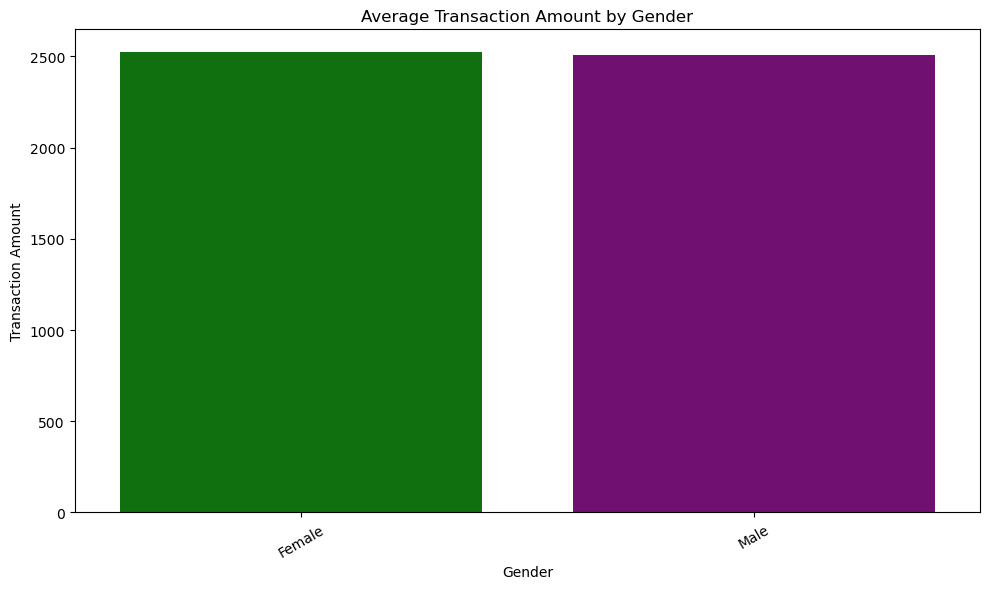

In [28]:
#16. Create a bar plot to show the average TransactionAmount by Gender.
plt.figure(figsize=(10,6))
average_amount=combined_data.groupby('Gender')['TransactionAmount'].mean()
print(average_amount)
sns.barplot(average_amount,palette=['green','purple'])
plt.title('Average Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.tick_params(axis='x',rotation=30)
plt.tight_layout()
plt.show()